## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import os 
import warnings
import seaborn as sns


warnings.filterwarnings("ignore")
sns.set(color_codes = True)
sns.set_palette(palette = "magma",n_colors = 8)

## import dataset

In [2]:
data = pd.read_csv("Book_Dataset_1.csv")
data.head(5)

,Unnamed: 0,Title,Category,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Book_Description,Image_Link,Stars
0,0,A Light in the Attic,Poetry,51.77,51.77,0.0,22,0,It's hard to imagine a world without A Light i...,http://books.toscrape.com/media/cache/fe/72/fe...,3
1,1,Tipping the Velvet,Historical Fiction,53.74,53.74,0.0,20,0,"""Erotic and absorbing...Written with starling ...",http://books.toscrape.com/media/cache/08/e9/08...,1
2,2,Soumission,Fiction,50.10,50.10,0.0,20,0,"Dans une France assez proche de la nÃ´tre, un ...",http://books.toscrape.com/media/cache/ee/cf/ee...,1
3,3,Sharp Objects,Mystery,47.82,47.82,0.0,20,0,"WICKED above her hipbone, GIRL across her hear...",http://books.toscrape.com/media/cache/c0/59/c0...,4
4,4,Sapiens: A Brief History of Humankind,History,54.23,54.23,0.0,20,0,From a renowned historian comes a groundbreaki...,http://books.toscrape.com/media/cache/ce/5f/ce...,5


In [3]:
data.shape

(1000, 11)

In [4]:
data.dtypes

Unnamed: 0             int64
Title                 object
Category              object
Price                float64
Price_After_Tax      float64
Tax_amount           float64
Avilability            int64
Number_of_reviews      int64
Book_Description      object
Image_Link            object
Stars                  int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Title              1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price              1000 non-null   float64
 4   Price_After_Tax    1000 non-null   float64
 5   Tax_amount         1000 non-null   float64
 6   Avilability        1000 non-null   int64  
 7   Number_of_reviews  1000 non-null   int64  
 8   Book_Description   1000 non-null   object 
 9   Image_Link         1000 non-null   object 
 10  Stars              1000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [6]:
data.axes

[RangeIndex(start=0, stop=1000, step=1),
 Index(['Unnamed: 0', 'Title', 'Category', 'Price', 'Price_After_Tax',
        'Tax_amount', 'Avilability', 'Number_of_reviews', 'Book_Description',
        'Image_Link', 'Stars'],
       dtype='object')]

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.50000,288.819436,0.0,249.7500,499.50,749.2500,999.00
Price,1000.0,35.07035,14.446690,10.0,22.1075,35.98,47.4575,59.99
Price_After_Tax,1000.0,35.07035,14.446690,10.0,22.1075,35.98,47.4575,59.99
Tax_amount,1000.0,0.00000,0.000000,0.0,0.0000,0.00,0.0000,0.00
Avilability,1000.0,8.58500,5.654622,1.0,3.0000,7.00,14.0000,22.00
Number_of_reviews,1000.0,0.00000,0.000000,0.0,0.0000,0.00,0.0000,0.00
Stars,1000.0,2.92300,1.434967,1.0,2.0000,3.00,4.0000,5.00


In [8]:
data.describe(exclude="number").T

,count,unique,top,freq
Title,1000,999,The Star-Touched Queen,2
Category,1000,50,Default,152
Book_Description,1000,999,\n\n\n\n\n\n,2
Image_Link,1000,1000,http://books.toscrape.com/media/cache/fe/72/fe...,1


In [9]:
data["Category"].nunique()

50

In [10]:
corr=data.corr()
corr

,Unnamed: 0,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Stars
Unnamed: 0,1.000000,0.016563,0.016563,NaN,-0.978961,NaN,-0.014017
Price,0.016563,1.000000,1.000000,NaN,-0.010914,NaN,0.028166
Price_After_Tax,0.016563,1.000000,1.000000,NaN,-0.010914,NaN,0.028166
Tax_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avilability,-0.978961,-0.010914,-0.010914,NaN,1.000000,NaN,0.016166
Number_of_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stars,-0.014017,0.028166,0.028166,NaN,0.016166,NaN,1.000000


<AxesSubplot:>

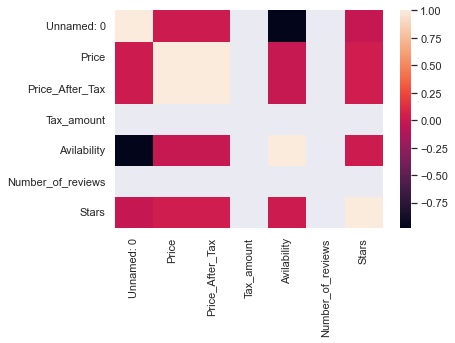

In [11]:
sns.heatmap(corr)


## data visualization

Text(0.5, 1.0, 'Category histogram')

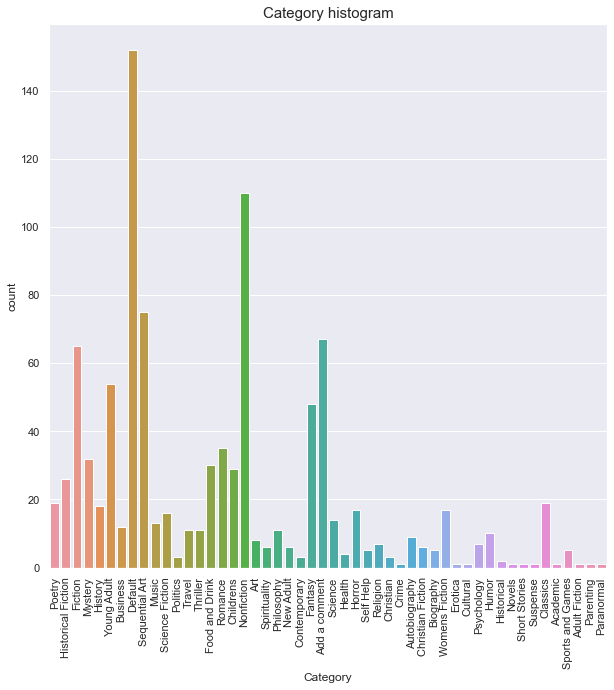

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(data["Category"])
plt.xticks(rotation=90)
plt.title("Category histogram",fontsize=15)

Most books were of category: Default,Nonfiction,and sequential art respectively

<AxesSubplot:xlabel='Stars', ylabel='count'>

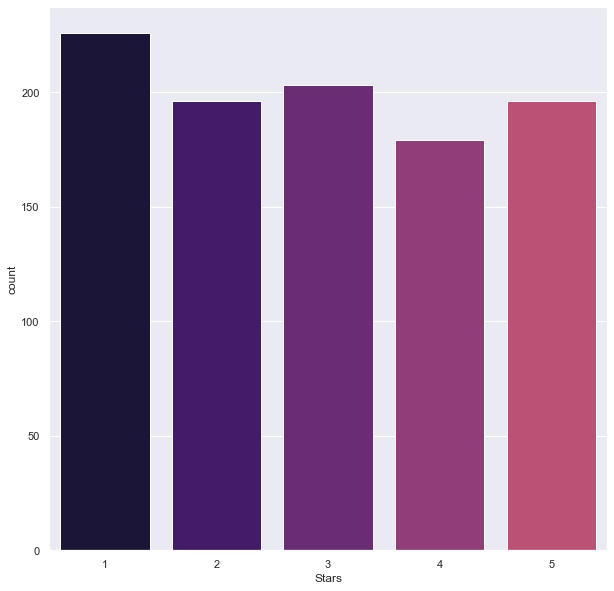

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(data["Stars"])

Most books were rated 1 while the least books were rated 4

## Bivariate Analysis

<AxesSubplot:xlabel='Stars', ylabel='Price'>

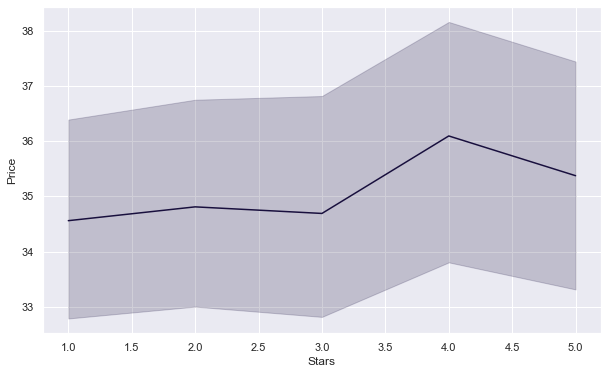

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data["Stars"],y=data["Price"])


The was a significant increase in price with an increase in Star rating

<AxesSubplot:xlabel='Avilability', ylabel='Price'>

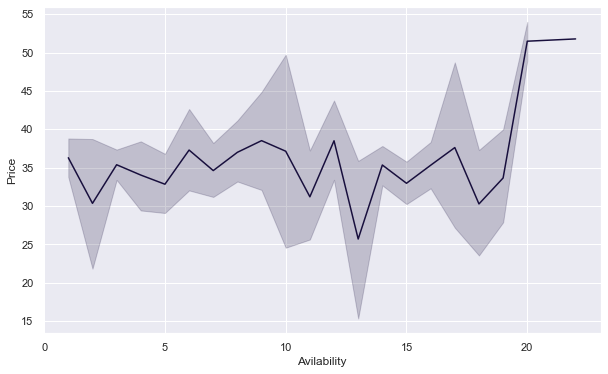

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data["Avilability"],y=data["Price"])

Most books with an availability higher than 17 were the most expensive

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

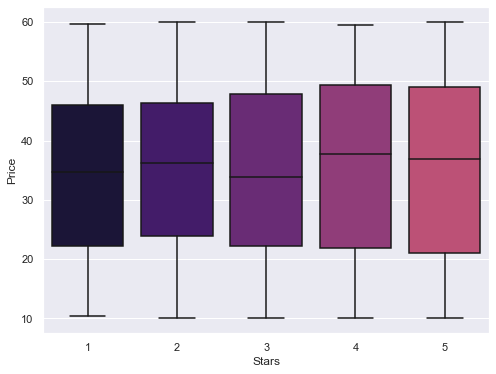

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data["Stars"],y=data["Price"])
plt.xticks(rotation=0)

In [17]:
books = data.groupby(["Title","Price","Category","Stars"])["Price"].count().reset_index(name="count")
books = books.sort_values("Price",ascending=False)
books = books.set_index("Price")
books

,Title,Category,Stars,count
Price,,,,
59.99,The Perfect Play (Play by Play #1),Romance,3,1
59.98,Last One Home (New Beginnings #1),Fiction,3,1
59.95,Civilization and Its Discontents,Psychology,2,1
59.92,The Barefoot Contessa Cookbook,Food and Drink,5,1
59.90,The Diary of a Young Girl,Nonfiction,3,1
...,...,...,...,...
10.23,Greek Mythic History,Default,5,1
10.16,Patience,Sequential Art,3,1
10.02,The Tipping Point: How Little Things Can Make ...,Add a comment,2,1


In [18]:
Top10_Price = books.head(10)
Top10_Price

,Title,Category,Stars,count
Price,,,,
59.99,The Perfect Play (Play by Play #1),Romance,3,1
59.98,Last One Home (New Beginnings #1),Fiction,3,1
59.95,Civilization and Its Discontents,Psychology,2,1
59.92,The Barefoot Contessa Cookbook,Food and Drink,5,1
59.90,The Diary of a Young Girl,Nonfiction,3,1
59.71,The Bone Hunters (Lexy Vaughan & Steven Macaul...,Thriller,3,1
59.64,Thomas Jefferson and the Tripoli Pirates: The ...,History,1,1
59.48,Boar Island (Anna Pigeon #19),Mystery,3,1
59.45,The Man Who Mistook His Wife for a Hat and Oth...,Nonfiction,4,1


In [19]:
by_Star = data.groupby(["Title","Price","Category","Stars"])["Price"].count().reset_index(name="count")
by_Star = by_Star.sort_values("Stars",ascending=False)
by_Star = by_Star.set_index("Stars")
by_Star

,Title,Price,Category,count
Stars,,,,
5,"""Most Blessed of the Patriarchs"": Thomas Jeffe...",44.48,History,1
5,Crazy Rich Asians (Crazy Rich Asians #1),49.13,Fiction,1
5,Superman Vol. 1: Before Truth (Superman by Gen...,11.89,Sequential Art,1
5,Steve Jobs,39.50,Default,1
5,Sophie's World,15.94,Philosophy,1
...,...,...,...,...
1,The Glass Castle,16.24,Add a comment,1
1,The Giver (The Giver Quartet #1),12.30,Default,1
1,"Fruits Basket, Vol. 7 (Fruits Basket #7)",19.57,Sequential Art,1


In [20]:
Top5_Star = by_Star.query("`Stars`>4")
Top5_Star

,Title,Price,Category,count
Stars,,,,
5,"""Most Blessed of the Patriarchs"": Thomas Jeffe...",44.48,History,1
5,Crazy Rich Asians (Crazy Rich Asians #1),49.13,Fiction,1
5,Superman Vol. 1: Before Truth (Superman by Gen...,11.89,Sequential Art,1
5,Steve Jobs,39.50,Default,1
5,Sophie's World,15.94,Philosophy,1
...,...,...,...,...
5,"Bleach, Vol. 1: Strawberry and the Soul Reaper...",34.65,Sequential Art,1
5,The Passion of Dolssa,28.32,Historical Fiction,1
5,Booked,17.49,Poetry,1
